In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm

# 데이터 불러오기

In [2]:
bmode_data = np.load('/home/jeonk636/MedialImg/Task3/artery_IQData_bmode.npy')
doppler_data = np.load('/home/jeonk636/MedialImg/Task3/artery_IQData_doppler_reshape.npy')

In [3]:
print(bmode_data)
print(bmode_data.shape)

[[ 3649470.54467773  5814467.42578125  4832985.71875    ...
   2751594.43945312  1883790.29785156  -830475.69921875]
 [ -655015.828125    -527870.28515625 -1211050.12304688 ...
   -666360.3203125    -43896.77148438   228703.06738281]
 [   74358.890625     -41383.46875     -724722.38476562 ...
   -180642.9453125    -87145.59472656    15670.11865234]
 ...
 [  871921.58984375  1265396.4609375    621101.02148438 ...
   -842720.49511719 -1379584.0234375   -976909.546875  ]
 [ -375074.4140625  -1151246.7265625   -727577.40625    ...
   -300960.3671875  -1333612.71484375 -1108057.8984375 ]
 [ -332842.98046875  1410455.44140625  1119079.20507812 ...
  -1196679.61328125  -703790.0625      -686022.8359375 ]]
(374, 380)


bmode_data : b_mode 영상의 ROI, 2D array  
(374,380) = (depth, lateral)  
각 요소는 해당 공간 위치에서 측정된 초음파 반사 신호의 진폭을 실수로 표현한 것  
log 변환 전 상태  
전체 깊이 방향 길이 = 37.4mm  
전체 횡방향 길이 = 38.0mm  

In [4]:
print(doppler_data)
print(doppler_data.shape)

[[[        0.                 0.                 0.         ...
           0.                 0.                 0.        ]
  [        0.                 0.                 0.         ...
           0.                 0.                 0.        ]
  [        0.                 0.                 0.         ...
           0.                 0.                 0.        ]
  ...
  [        0.                 0.                 0.         ...
           0.                 0.                 0.        ]
  [        0.                 0.                 0.         ...
           0.                 0.                 0.        ]
  [        0.                 0.                 0.         ...
           0.                 0.                 0.        ]]

 [[  -140643.703125     -139697.453125     -141552.734375   ...
     -142086.4375       -143545.109375     -141673.640625  ]
  [        0.                 0.                 0.         ...
           0.                 0.                 0.  

doppler_data : Doppler ROI 데이터, 3D numpy array  
(180, 95, 300) = (depth, lateral, ensemble)  

# B_mode

In [6]:
env = np.abs(bmode_data)
env

array([[3649470.54467773, 5814467.42578125, 4832985.71875   , ...,
        2751594.43945312, 1883790.29785156,  830475.69921875],
       [ 655015.828125  ,  527870.28515625, 1211050.12304688, ...,
         666360.3203125 ,   43896.77148438,  228703.06738281],
       [  74358.890625  ,   41383.46875   ,  724722.38476562, ...,
         180642.9453125 ,   87145.59472656,   15670.11865234],
       ...,
       [ 871921.58984375, 1265396.4609375 ,  621101.02148438, ...,
         842720.49511719, 1379584.0234375 ,  976909.546875  ],
       [ 375074.4140625 , 1151246.7265625 ,  727577.40625   , ...,
         300960.3671875 , 1333612.71484375, 1108057.8984375 ],
       [ 332842.98046875, 1410455.44140625, 1119079.20507812, ...,
        1196679.61328125,  703790.0625    ,  686022.8359375 ]])

In [7]:
log_env = 20 * np.log10(env + 1e-6)
log_env

array([[131.24459726, 135.29019884, 133.68431024, ..., 128.79168846,
        125.50065112, 118.38653858],
       [116.32503589, 114.45054431, 121.66324236, ..., 116.47418257,
         92.8486516 , 107.18543979],
       [ 97.42665804,  92.33653781, 117.20343351, ..., 105.13642011,
         98.80490876,  83.9014457 ],
       ...,
       [118.80954863, 122.04453231, 115.86324487, ..., 118.51367112,
        122.79496313, 119.79708708],
       [111.48234879, 121.22336817, 117.23758409, ..., 109.57018616,
        122.50059455, 120.89124908],
       [110.44478805, 122.98718741, 120.97721651, ..., 121.55955785,
        116.94886261, 116.72677145]])

In [8]:
bmode_norm = (log_env - log_env.min()) / (log_env.ptp())
bmode_norm

array([[0.75182709, 0.77759818, 0.76736843, ..., 0.73620169, 0.71523728,
        0.66991931],
       [0.65678723, 0.64484644, 0.69079241, ..., 0.65773732, 0.50723912,
        0.59856662],
       [0.53640171, 0.50397688, 0.66238276, ..., 0.58551406, 0.54518138,
        0.45024407],
       ...,
       [0.67261395, 0.69322129, 0.65384555, ..., 0.67072917, 0.69800164,
        0.67890472],
       [0.62593858, 0.68799035, 0.6626003 , ..., 0.61375782, 0.69612647,
        0.6858747 ],
       [0.61932916, 0.69922614, 0.68642232, ..., 0.69013193, 0.6607611 ,
        0.65934635]])

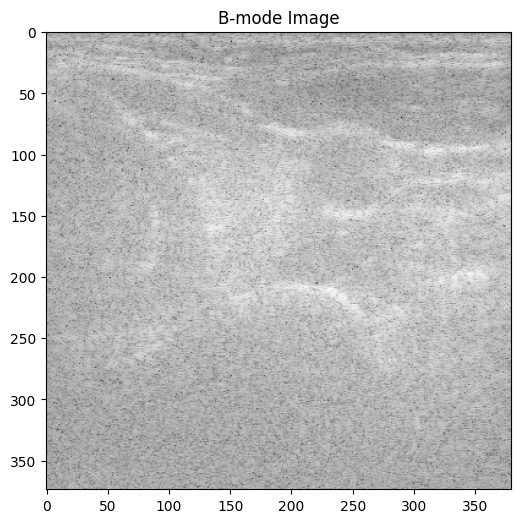

In [9]:
plt.figure(figsize=(6,6))
plt.imshow(bmode_norm, cmap='gray', origin = 'upper')
plt.title('B-mode Image')
plt.show()

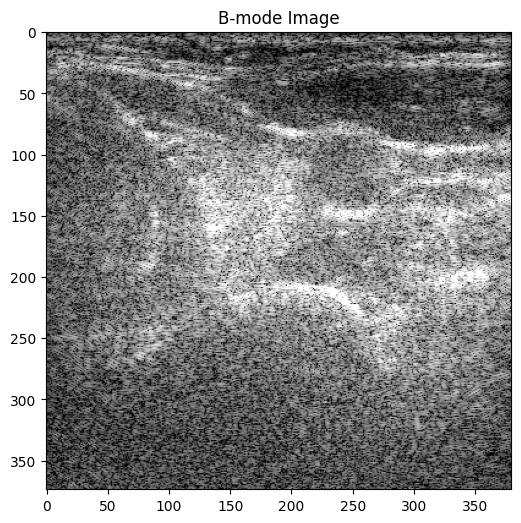

In [10]:
vmin, vmax = np.percentile(log_env, [5, 99])
bmode = (np.clip(log_env,vmin,vmax)-vmin)/(vmax-vmin)

plt.figure(figsize=(6, 6))
plt.imshow(bmode, cmap='gray', origin='upper')
plt.title('B-mode Image')
plt.show()

# Doppler Power Map

clutter 제거 전

In [11]:
power_before = np.sum(np.abs(doppler_data)**2, axis=2)
power_before_norm = (power_before - power_before.min()) / (power_before.ptp())
power_before_norm

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.09971211e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.73607419e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.96481018e-07, 1.81231518e-08, 0.00000000e+00],
       ...,
       [2.05352998e-03, 3.92767823e-03, 4.26105234e-03, ...,
        1.85306258e-03, 1.08376589e-03, 1.60630654e-03],
       [4.54002484e-04, 6.44699424e-04, 7.88797269e-04, ...,
        1.09523130e-03, 2.55100256e-03, 1.03872984e-03],
       [1.44611546e-03, 1.39410145e-03, 4.25802297e-03, ...,
        3.24931614e-03, 1.14365050e-03, 9.08305080e-04]])

In [12]:
print(power_before.shape)

(180, 95)


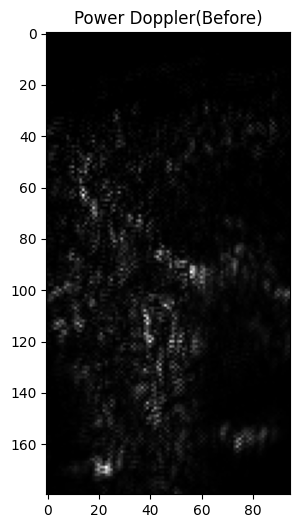

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(power_before_norm, cmap='gray', origin = 'upper')
plt.title('Power Doppler(Before)')
plt.show()

# SVD

In [14]:
d, l, e = doppler_data.shape
X = doppler_data.reshape(d*l,e)
print(X.shape)

(17100, 300)


# Threshold 결정

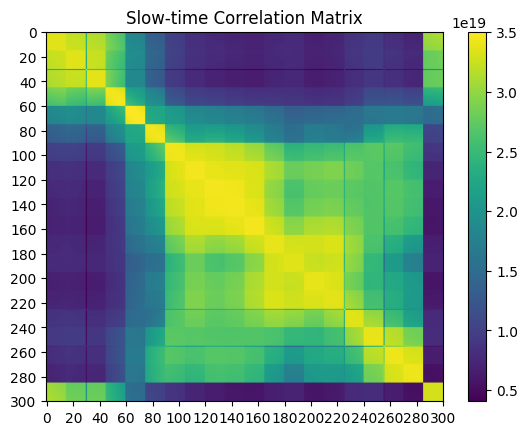

In [15]:
R_t = X.conj().T @ X 
plt.figure()
plt.imshow(np.abs(R_t), aspect='auto', origin='upper')
plt.title('Slow-time Correlation Matrix')
plt.colorbar()
interval = 20
range = np.arange(0, R_t.shape[0]+1, interval)
plt.xticks(range)
plt.yticks(range)

plt.show()

- 상단 좌측 노란 블록 : 이 구간의 샘플들끼리 상호 상관도가 높음, clutter 신호, 약 60개   
- 그 후 : 60~300은 혈류와 노이즈가 섞여 있음  
- 노이즈 : 285~300

In [16]:
(X.conj().T).shape

(300, 17100)

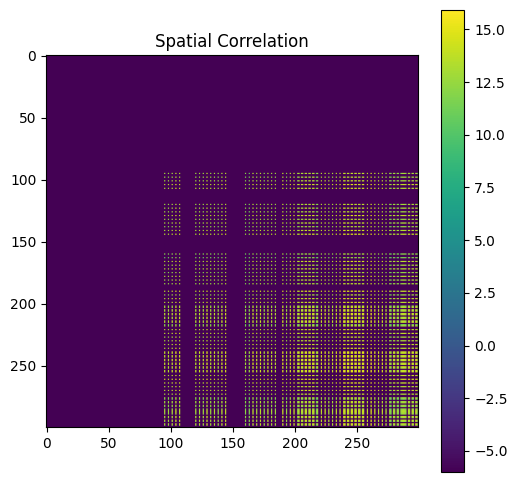

In [17]:
R_s = X @ X.conj().T
R_s_log = np.log10(np.abs(R_s) + 1e-6)
plt.figure(figsize=(6,6))
plt.imshow(R_s_log[:300, :300], cmap='viridis', origin='upper')
plt.title('Spatial Correlation')
plt.colorbar()

plt.show()

In [18]:
U, S, V = np.linalg.svd(X, full_matrices=False)
print(U.shape, S.shape, V.shape)

(17100, 300) (300,) (300, 300)


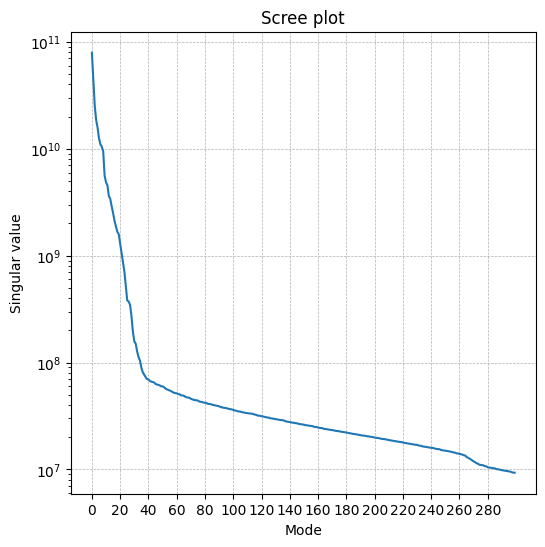

In [19]:
plt.figure(figsize=(6,6))
plt.plot(S)
plt.yscale('log')
plt.xlabel('Mode')
plt.ylabel('Singular value')
plt.title('Scree plot')

x_interval = 20
x_ticks = np.arange(0, len(S), x_interval)
plt.xticks(x_ticks)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
S_filt = S.copy()
S_filt[:60] = 0  
S_filt[190:] = 0 
X_new = U @ np.diag(S_filt) @ V
doppler = X_new.reshape(d, l, e)

power_after = np.sum(np.abs(doppler)**2, axis=2) 
power_after_norm = (power_after - power_after.min()) / power_after.ptp()

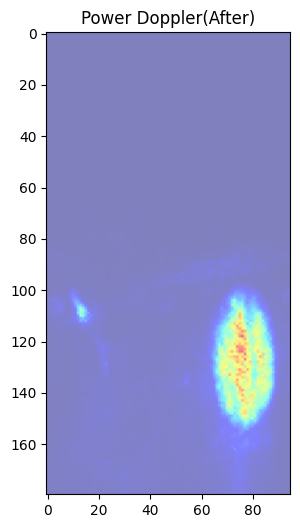

In [21]:
plt.figure(figsize=(6,6))
plt.imshow(power_after_norm, cmap='jet', alpha=0.5, origin='upper')
plt.title('Power Doppler(After)')
plt.show()

# 이미지 맞추기

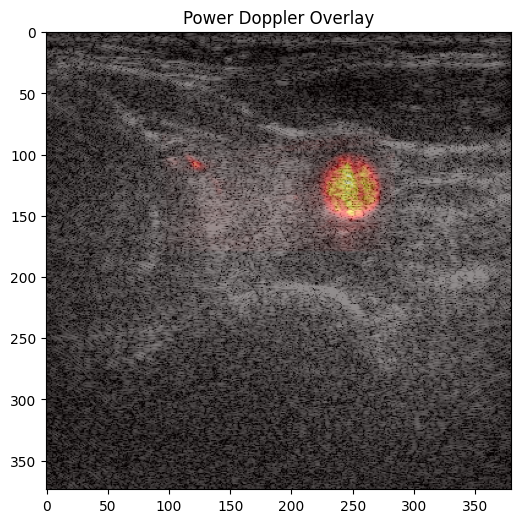

In [ ]:
power_resized = cv2.resize(power_after_norm, (l*2, d), interpolation=cv2.INTER_LINEAR)

dx = int(round(190 - 95)) # 47.5*2 = 95
dy = 0
M = np.array([[1, 0, dx], [0, 1, dy]], dtype=np.float32)

aligned = cv2.warpAffine(power_resized, M ,(bmode_norm.shape[1], bmode_norm.shape[0]),
    flags=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=0
)

plt.figure(figsize=(6, 6))
plt.imshow(bmode, cmap='gray', origin='upper')
plt.imshow(aligned, cmap='hot', alpha=0.45, origin='upper')
plt.title('Power Doppler Overlay')
plt.show()

/tmp/ipykernel_1334089/1606708722.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hot')


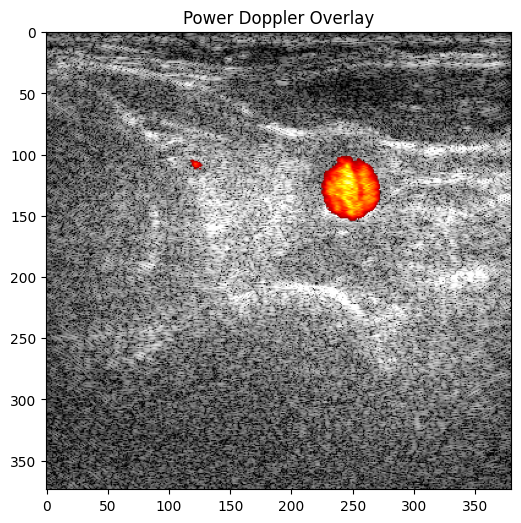

In [23]:
bmode_rgb = np.stack([bmode]*3, axis=-1)

cmap = cm.get_cmap('hot')
doppler_rgb = cmap(aligned)[:, :, :3]

overlay = bmode_rgb.copy()
overlay[aligned >= 0.2] = doppler_rgb[aligned >= 0.2] 

plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.title('Power Doppler Overlay')
plt.show()